In [5]:
from nltk.corpus import stopwords

In [29]:
def refine_raw_data(filename):
    filename_out = filename.strip('.rawtext')+str('.txt')
    data = open(filename, 'r')
    data = data.read()
    data = ' '.join(data.split())


    stopWords = set(stopwords.words('english'))

    filtered = ''
    sentence = ''
    for x in data:
        if x != '.':
            if x in [',', '“', '”','—','(', ')']:
                pass
            else:
                sentence = sentence + x
        if x == '.':
            filtered = filtered + check(sentence,stopWords) + '\n'
            sentence = ''
    print(filtered)
    #data_out = open(filename_out, 'w+')
    #data_out.write(filtered)
    #data_out.close()
    #print(filtered)



In [30]:
def check(sentence,stopWords):
    temp = ''
    for x in sentence.split():
        if x in stopWords:
            pass
        if x not in stopWords:

            temp = temp + str(x) + ' '

    return temp


In [31]:
refine_raw_data('/home/agha/Sir Naeem/next/project/December/Dec 1/news.rawtext')

The heads nearly parliamentary parties Tuesday agreed increase number seats National Assembly favour fresh delimitation constituencies take place next year’s general elections 
Apart issues highlighted Muttah­i­da Qaumi Movement MQM Pakistan Peo­ples Party PPP government agreed address passage fresh law decision table delimitation bill National Assembly session beginning Thursday made consensus 
Since number NA seats Sindh would remain MQM demanded fresh delimitation basis number voters constituency instead number people 
The meeting held threadbare discussion decided increase made existing 272 seats lower house fresh delimitation constituencies made basis 2017 census NA Speaker Sardar Ayaz Sadiq chaired Tuesday’s meeting later told press conference 
He also revealed committee decided increase decrease number provincial assembly seats 
The delimitation national provincial assembly constituencies mandatory fresh consensus government needs two-thirds majority pass constitutional amendmen

In [44]:
import matplotlib.pyplot as plt

In [45]:
year_dict ={'November': {'Pak-Afghan Pakistan border': '37.5', 'terrorists Pakistan border': '37.5', 'Pak-Iran terrorists border': '33.3333', 'agreed Pakistan Iran': '33.3333', 'Gen IRGC Bajwa': '33.3333'}, 'December': {'message video political': '33.3333', 'Mohajir community political': '22.2222', 'however MQM political': '22.2222', 'message Musharraf video': '22.2222', 'message Musharraf political': '22.2222'}, 'October': {'New Zealand match': '33.3333', 'Australia hosts match': '33.3333', 'play match Pakistan': '33.3333', 'women New Zealand': '25', 'five wickets balls': '25'}, 'September': {'arrested statement suspects': '28.5714', 'At least killed': '25', 'five people wounded': '25', 'people said wounded': '25', 'suffered arm face': '25'}}


In [148]:
def get_coordinates(dictionary):

    dates = []
    words_in_dates = []
    magnitude_per_words = []
    temp_w = []
    temp_m = []
    temp_area = []
    area = []
    x_coordinates = []
    y_coordinates = []
    temp_x = []
    temp_y = []

    for day, value in dictionary.items():
        dates.append(day)
        for words, magnitude in value.items():
            temp_w.append(words)
            print(words)
            temp_m.append(float(magnitude))
            for x in magnitude.split():
                temp_area.append(round(2 * math.pi * float(x))*5)
                #temp_area.append(float(x))

        area.append(temp_area)
        words_in_dates.append(temp_w)
        magnitude_per_words.append(temp_m)
        temp_w = []
        temp_m = []
        temp_area = []


    for i in range(len(magnitude_per_words)):
        for j in range(len(magnitude_per_words[i])):
            temp_x.append(i + 1)
            temp_y.append(j + 1)
        x_coordinates.append(temp_x)
        y_coordinates.append(temp_y)
        temp_x = []
        temp_y = []


get_coordinates(year_dict)


Pak-Afghan Pakistan border
terrorists Pakistan border
Pak-Iran terrorists border
agreed Pakistan Iran
Gen IRGC Bajwa
message video political
Mohajir community political
however MQM political
message Musharraf video
message Musharraf political
New Zealand match
Australia hosts match
play match Pakistan
women New Zealand
five wickets balls
arrested statement suspects
At least killed
five people wounded
people said wounded
suffered arm face


In [149]:
dates ,x_coordinates, y_coordinates, words_in_dates, magnitude_per_words, area = get_coordinates(year_dict)

Pak-Afghan Pakistan border
terrorists Pakistan border
Pak-Iran terrorists border
agreed Pakistan Iran
Gen IRGC Bajwa
message video political
Mohajir community political
however MQM political
message Musharraf video
message Musharraf political
New Zealand match
Australia hosts match
play match Pakistan
women New Zealand
five wickets balls
arrested statement suspects
At least killed
five people wounded
people said wounded
suffered arm face


TypeError: 'NoneType' object is not iterable

In [150]:
words_in_dates 

[['Pak-Afghan Pakistan border',
  'Pak-Afghan Pakistan border',
  'Pak-Iran terrorists border',
  'agreed Pakistan Iran',
  'Gen IRGC Bajwa'],
 ['message video political',
  'Mohajir community political',
  'however MQM political',
  'message Musharraf video',
  'message Musharraf political'],
 ['New Zealand match',
  'Australia hosts match',
  'play match Pakistan',
  'women New Zealand',
  'five wickets balls'],
 ['arrested statement suspects',
  'At least killed',
  'five people wounded',
  'people said wounded',
  'suffered arm face']]

In [146]:
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+",
           "x","X","D","d","|","_",'TICKLEFT','TICKRIGHT','TICKUP','TICKDOWN','CARETLEFT',
           'CARETRIGHT','CARETUP','CARETDOWN','CARETLEFTBASE','CARETRIGHTBASE','CARETUPBASE']


In [43]:
def create_marker_array():
    marker_array = []



for i in range(len(dates)):
    for j in range(len(magnitude_per_words)):
        for k in range(len(magnitude_per_words[j])):
            # print(magnitude_per_words[j][k])
            plt.text(x=x_coordinates[j][k], y=y_coordinates[j][k], s=words_in_dates[j][k],
                     fontsize=8, horizontalalignment='center')

plt.title("WORDS USED IN TODAY'S NEWS")

#if month == False:
#    plt.xlabel('Yearly Data')
#else:
#    plt.xlabel('Month Of ' + str(month_folder))
#plt.ylabel('Number Of Trends')
# xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
# plt.yticks(list(range(1, 10+ 1)))
#plt.xticks(list(range(1, len(dates) + 1)), dates)

#plt.scatter(x_coordinates, y_coordinates, s=area, linewidths=2, edgecolor='w')
#plt.show()


#grand_out_png = grand_out.strip('.out')+str('.png')
#plt.savefig(grand_out_png, format='png', dpi=1000)
#plt.clf()

[['Pak-Afghan Pakistan border',
  'terrorists Pakistan border',
  'Pak-Iran terrorists border',
  'agreed Pakistan Iran',
  'Gen IRGC Bajwa'],
 ['message video political',
  'Mohajir community political',
  'however MQM political',
  'message Musharraf video',
  'message Musharraf political'],
 ['New Zealand match',
  'Australia hosts match',
  'play match Pakistan',
  'women New Zealand',
  'five wickets balls'],
 ['arrested statement suspects',
  'At least killed',
  'five people wounded',
  'people said wounded',
  'suffered arm face']]

In [118]:
qwe = ((('Agha',2),('Awais',3)),
       (('Pathan',2),('Tareen',3)))

In [247]:
marker_dict = {}
k = 0
for i in range(len(words_in_dates)):
    #print(words_in_dates[i])
    for j in range(len(words_in_dates[i])):
        print(words_in_dates[i][j])
        if words_in_dates[i][j] in marker_dict:
            pass
        if words_in_dates[i][j] not in marker_dict:
            marker_dict[words_in_dates[i][j]] = markers[k]
            k +=1
    

Pak-Afghan Pakistan border
Pak-Afghan Pakistan border
Pak-Iran terrorists border
agreed Pakistan Iran
Gen IRGC Bajwa
message video political
Mohajir community political
however MQM political
message Musharraf video
message Musharraf political
New Zealand match
Australia hosts match
play match Pakistan
women New Zealand
five wickets balls
arrested statement suspects
At least killed
five people wounded
people said wounded
suffered arm face


In [248]:
marker_dict

{'At least killed': '*',
 'Australia hosts match': '4',
 'Gen IRGC Bajwa': 'v',
 'Mohajir community political': '<',
 'New Zealand match': '3',
 'Pak-Afghan Pakistan border': '.',
 'Pak-Iran terrorists border': ',',
 'agreed Pakistan Iran': 'o',
 'arrested statement suspects': 'P',
 'five people wounded': 'h',
 'five wickets balls': 'p',
 'however MQM political': '>',
 'message Musharraf political': '2',
 'message Musharraf video': '1',
 'message video political': '^',
 'people said wounded': 'H',
 'play match Pakistan': '8',
 'suffered arm face': '+',
 'women New Zealand': 's'}

In [249]:
markers_array = []
temp = []

for i in range(len(words_in_dates)):
    #print(words_in_dates[i])
    for j in range(len(words_in_dates[i])):
        print(marker_dict[words_in_dates[i][j]])
        temp.append(marker_dict[words_in_dates[i][j]])
    
    markers_array.append(temp)
    temp = []

.
.
,
o
v
^
<
>
1
2
3
4
8
s
p
P
*
h
H
+


In [250]:
markers_array

[['.', '.', ',', 'o', 'v'],
 ['^', '<', '>', '1', '2'],
 ['3', '4', '8', 's', 'p'],
 ['P', '*', 'h', 'H', '+']]

In [251]:
def get_markers(words_in_dates):
    markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+",
               "x", "X", "D", "d", "|", "_", 'TICKLEFT', 'TICKRIGHT', 'TICKUP', 'TICKDOWN', 'CARETLEFT',
               'CARETRIGHT', 'CARETUP', 'CARETDOWN', 'CARETLEFTBASE', 'CARETRIGHTBASE', 'CARETUPBASE']

    marker_dict = {}
    markers_array = []
    temp = []
    k = 0


    for i in range(len(words_in_dates)):
        for j in range(len(words_in_dates[i])):
            if words_in_dates[i][j] in marker_dict:
                pass
            if words_in_dates[i][j] not in marker_dict:
                marker_dict[words_in_dates[i][j]] = markers[k]
                k += 1


    for i in range(len(words_in_dates)):
        for j in range(len(words_in_dates[i])):
            temp.append(marker_dict[words_in_dates[i][j]])

        markers_array.append(temp)
        temp = []

    return markers_array

In [252]:
get_markers(words_in_dates)

[['.', '.', ',', 'o', 'v'],
 ['^', '<', '>', '1', '2'],
 ['3', '4', '8', 's', 'p'],
 ['P', '*', 'h', 'H', '+']]

In [271]:
markers_array

[['.', '.', ',', 'o', 'v'],
 ['^', '<', '>', '1', '2'],
 ['3', '4', '8', 's', 'p'],
 ['P', '*', 'h', 'H', '+']]

In [272]:
words_in_dates

[['Pak-Afghan Pakistan border',
  'Pak-Afghan Pakistan border',
  'Pak-Iran terrorists border',
  'agreed Pakistan Iran',
  'Gen IRGC Bajwa'],
 ['message video political',
  'Mohajir community political',
  'however MQM political',
  'message Musharraf video',
  'message Musharraf political'],
 ['New Zealand match',
  'Australia hosts match',
  'play match Pakistan',
  'women New Zealand',
  'five wickets balls'],
 ['arrested statement suspects',
  'At least killed',
  'five people wounded',
  'people said wounded',
  'suffered arm face']]

In [273]:
from collections import OrderedDict
import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

['Pak-Afghan Pakistan border', 'Pak-Afghan Pakistan border', 'Pak-Iran terrorists border', 'agreed Pakistan Iran', 'Gen IRGC Bajwa', 'message video political', 'Mohajir community political', 'however MQM political', 'message Musharraf video', 'message Musharraf political', 'New Zealand match', 'Australia hosts match', 'play match Pakistan', 'women New Zealand', 'five wickets balls', 'arrested statement suspects', 'At least killed', 'five people wounded', 'people said wounded', 'suffered arm face', 'Pak-Afghan Pakistan border', 'Pak-Afghan Pakistan border', 'Pak-Iran terrorists border', 'agreed Pakistan Iran', 'Gen IRGC Bajwa', 'message video political', 'Mohajir community political', 'however MQM political', 'message Musharraf video', 'message Musharraf political', 'New Zealand match', 'Australia hosts match', 'play match Pakistan', 'women New Zealand', 'five wickets balls', 'arrested statement suspects', 'At least killed', 'five people wounded', 'people said wounded', 'suffered arm fa

In [332]:

for j in range(len(magnitude_per_words)):
    for k in range(len(magnitude_per_words[j])):
        plt.scatter(x_coordinates[j][k], y_coordinates[j][k], s=100, c='b', 
                    marker=markers_array[j][k], label=words_in_dates[j][k])
        #plt.legend(words_in_dates[j][k])
        #print(words_in_dates[j][k])

plt.title("WORDS USED IN TODAY'S NEWS")
plt.xticks(list(range(1, len(dates) + 1)), dates)
plt.yticks(list(range(1, len(magnitude_per_words[0]) + 1)))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.03, 1.03))

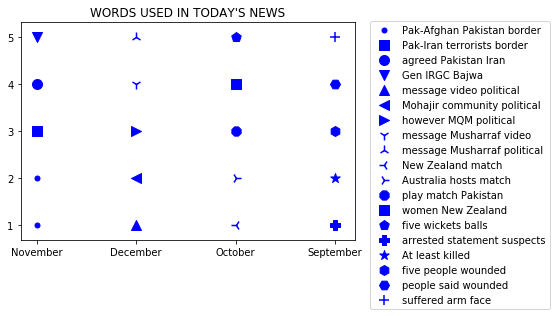

In [333]:
plt.show()
plt.clf()

In [307]:
qwe, asd =plt.yticks()

In [311]:
print(list(range(1, len(magnitude_per_words[0]) + 1)))

[1, 2, 3, 4, 5]
